# Explore Bank Marketing Campaign

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
df = pd.read_csv('../data/raw/bank-marketing-campaign-data.csv', sep=';')

## Exploratory Data Analysis

In [4]:
print(df.shape)
print(df.info())

(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   411

- The data consists of 41.188 rows with 21 columns
- There's 10 numerical and 11 categorical data types

#### Checking for null-values

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
# remove duplicates
df = df.drop_duplicates().reset_index(drop=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### Categorical Data

In [8]:
# job
df['job'].value_counts()

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

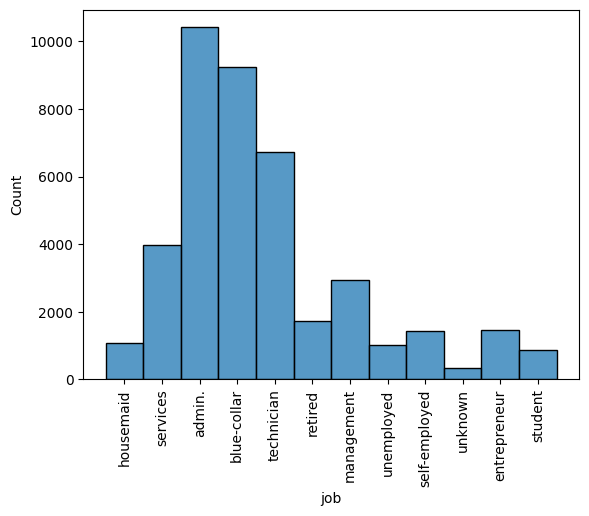

In [9]:
sns.histplot(data=df, x='job')

plt.xticks(rotation='vertical')
plt.show()


In [10]:
df["job_n"] = pd.factorize(df["job"])[0]

In [11]:
# marital
df['marital'].value_counts()

marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64

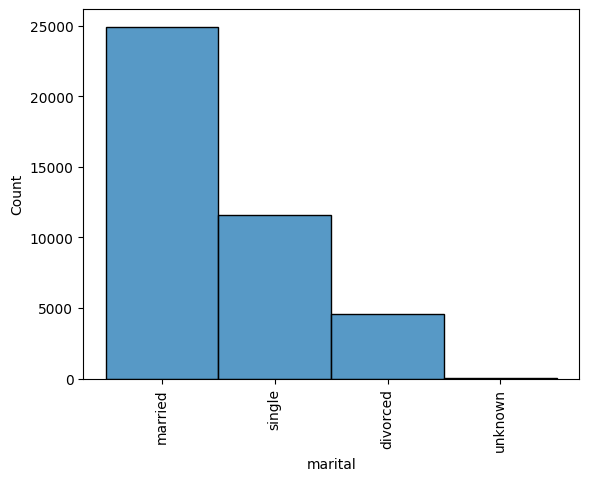

In [12]:
sns.histplot(data=df, x='marital')

plt.xticks(rotation='vertical')
plt.show()

In [13]:
df["marital_n"] = pd.factorize(df["marital"])[0]

In [14]:
# education
df['education'].value_counts()

education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64

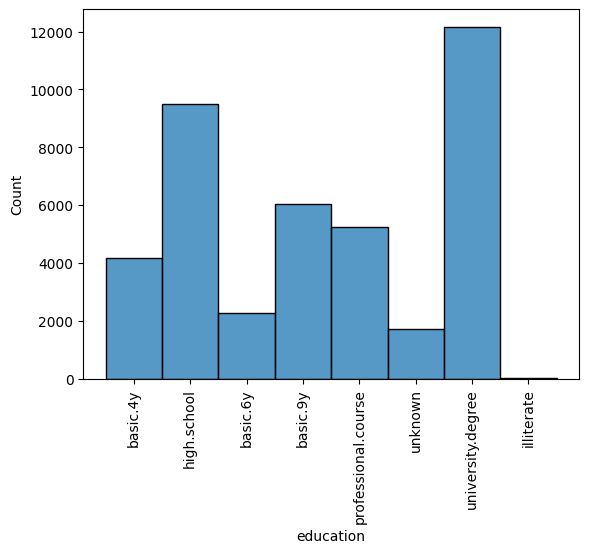

In [15]:
sns.histplot(data=df, x='education')

plt.xticks(rotation='vertical')
plt.show()

In [16]:
df["education_n"] = pd.factorize(df["education"])[0]

In [17]:
# default
df['default'].value_counts()

default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64

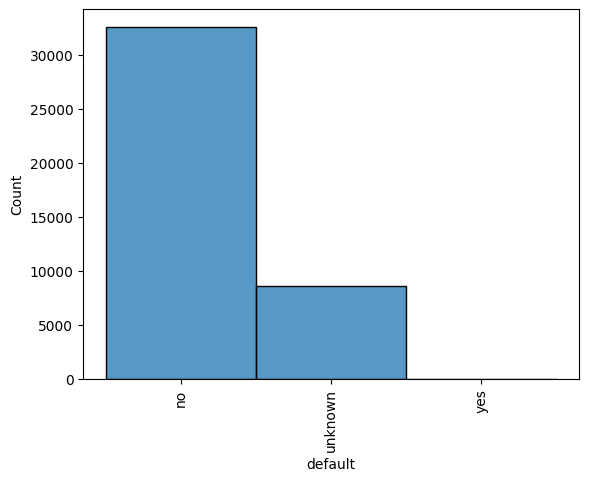

In [18]:
sns.histplot(data=df, x='default')

plt.xticks(rotation='vertical')
plt.show()

In [19]:
df["default_n"] = pd.factorize(df["default"])[0]

In [20]:
# housing
df['housing'].value_counts()

housing
yes        21571
no         18615
unknown      990
Name: count, dtype: int64

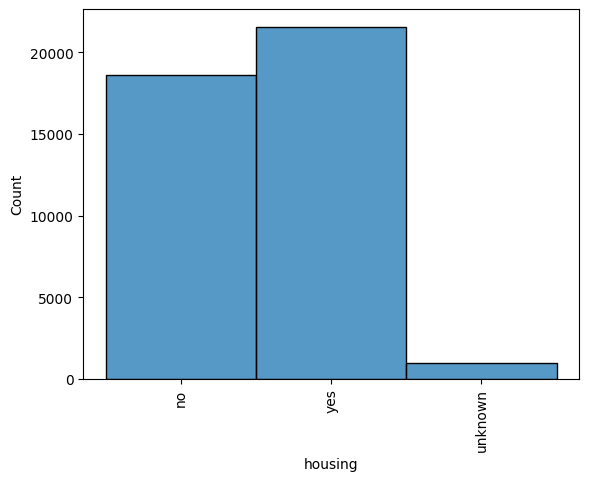

In [21]:
sns.histplot(data=df, x='housing')

plt.xticks(rotation='vertical')
plt.show()

In [22]:
df["housing_n"] = pd.factorize(df["housing"])[0]

In [23]:
# loan
df['loan'].value_counts()

loan
no         33938
yes         6248
unknown      990
Name: count, dtype: int64

<Axes: xlabel='loan', ylabel='Count'>

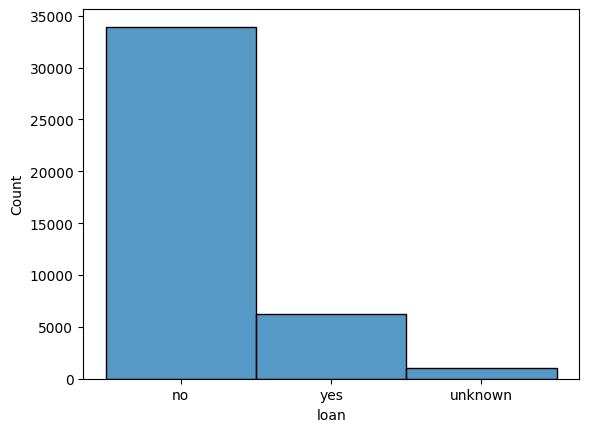

In [24]:
sns.histplot(data=df, x='loan')

In [25]:
df["loan_n"] = pd.factorize(df["loan"])[0]

In [26]:
# contact
df['contact'].value_counts()

contact
cellular     26135
telephone    15041
Name: count, dtype: int64

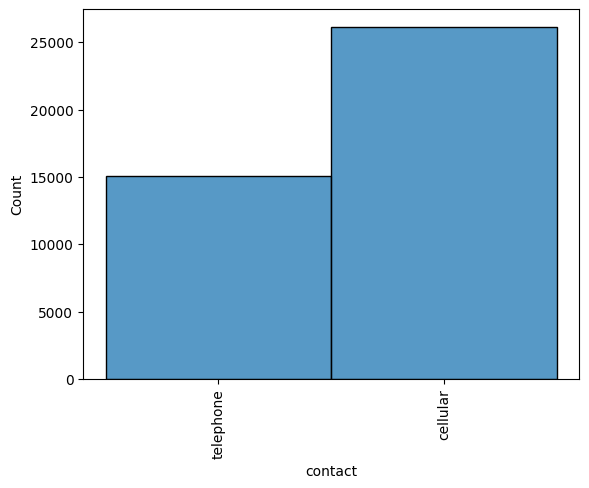

In [27]:
sns.histplot(data=df, x='contact')

plt.xticks(rotation='vertical')
plt.show()

In [28]:
df["contact_n"] = pd.factorize(df["contact"])[0]

In [29]:
# month
df['month'].value_counts()

month
may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: count, dtype: int64

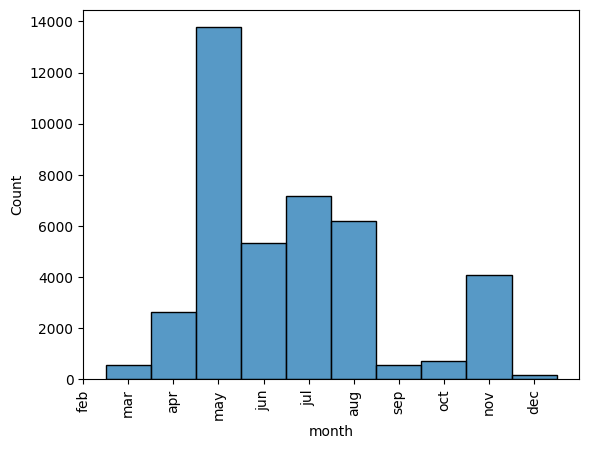

In [30]:
df['month'] = pd.Categorical(df['month'], categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ordered=True)

sns.histplot(data=df, x='month')

plt.xticks(rotation='vertical')
plt.show()

In [31]:
df["month_n"] = pd.factorize(df["month"])[0]

In [32]:
# day_of_week
df['day_of_week'].value_counts()

day_of_week
thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: count, dtype: int64

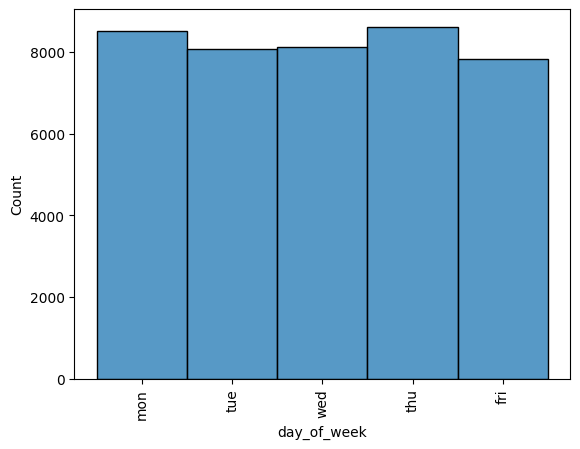

In [33]:
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=['mon', 'tue', 'wed', 'thu', 'fri'], ordered=True)

sns.histplot(data=df, x='day_of_week')

plt.xticks(rotation='vertical')
plt.show()

In [34]:
df["day_of_week_n"] = pd.factorize(df["day_of_week"])[0]

In [35]:
# poutcome
df['poutcome'].value_counts()

poutcome
nonexistent    35551
failure         4252
success         1373
Name: count, dtype: int64

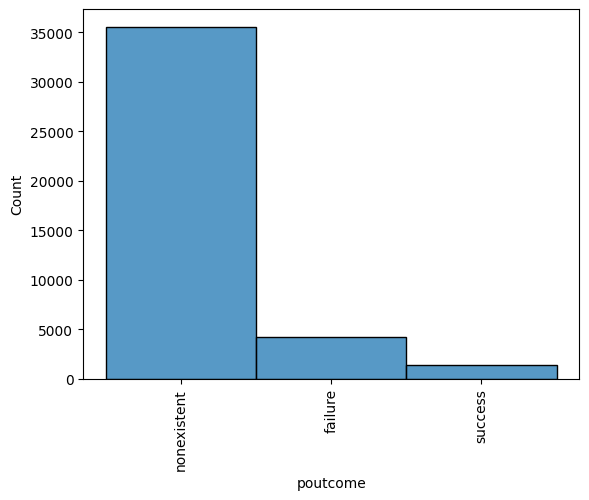

In [36]:
sns.histplot(data=df, x='poutcome')

plt.xticks(rotation='vertical')
plt.show()

In [37]:
df["poutcome_n"] = pd.factorize(df["poutcome"])[0]

In [38]:
# y
df['y'].value_counts()

y
no     36537
yes     4639
Name: count, dtype: int64

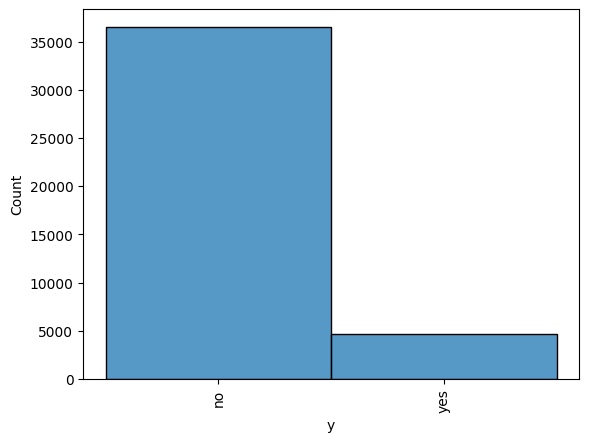

In [39]:
sns.histplot(data=df, x='y')

plt.xticks(rotation='vertical')
plt.show()

In [40]:
df["y_n"] = pd.factorize(df["y"])[0]

In [41]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,1,1,0,0,0,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,1,0,1,0,0,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,2,0,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,4,0,1,0,1,5,4,0,1
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,4,0,0,0,1,5,4,0,0
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,6,0,1,0,1,5,4,0,0
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,4,0,0,0,1,5,4,0,1


In [42]:
df_clean = df[['age', 'job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n', 'contact_n', 'month_n', 'day_of_week_n', 'duration', 'campaign', 'pdays', 'previous', 'poutcome_n', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y_n']]

In [43]:
df_clean

,age,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,...,campaign,pdays,previous,poutcome_n,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_n
0,56,0,0,0,0,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,0,1,1,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,0,1,0,1,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2,0,2,0,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,0,1,0,0,1,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,5,0,4,0,1,0,1,5,4,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1
41172,46,3,0,4,0,0,0,1,5,4,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41173,56,5,0,6,0,1,0,1,5,4,...,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41174,44,4,0,4,0,0,0,1,5,4,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [44]:
df_clean.to_csv('../data/processed/bank-marketing-campaign-data-clean.csv', index=False)

In [57]:
X = df_clean.drop('y_n', axis=1)
y = df_clean['y_n']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [82]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [88]:
y_pred = model.predict(X_test)
import sklearn.metrics as metrics
metrics.accuracy_score(y_test, y_pred)

0.9037303283466097